In [1]:
#no scaling data to see the difference in results

In [2]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
from scipy import stats

In [3]:
file_path = "../Resources/Exploration/Resources/cleaned1.csv"
life_expect_df = pd.read_csv(file_path)
life_expect_df

,Unnamed: 0,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,percentage expenditure,Measles,BMI,under-five deaths,Polio,Diphtheria,HIV/AIDS,GDP,thinness 5-9 years,Income composition of resources,Schooling,UN_population,GDP2
0,0,Afghanistan,2015,Developing,65.0,263.0,62,71.279624,1154,19.1,83,6.0,65.0,0.1,584.259210,17.3,0.479,10.1,27101365.0,584.259210
1,1,Afghanistan,2014,Developing,59.9,271.0,64,73.523582,492,18.6,86,58.0,62.0,0.1,612.696514,17.5,0.476,10.0,26556754.0,612.696514
2,2,Afghanistan,2013,Developing,59.9,268.0,66,73.219243,430,18.1,89,62.0,64.0,0.1,631.744976,17.7,0.470,9.9,26023100.0,631.744976
3,3,Afghanistan,2012,Developing,59.5,272.0,69,78.184215,2787,17.6,93,67.0,67.0,0.1,669.959000,18.0,0.463,9.8,25500100.0,669.959000
4,4,Afghanistan,2011,Developing,59.2,275.0,71,7.097109,3013,17.2,97,68.0,68.0,0.1,63.537231,18.2,0.454,9.5,24987700.0,63.537231
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,2933,Zimbabwe,2004,Developing,44.3,723.0,27,0.000000,31,27.1,42,67.0,65.0,33.6,454.366654,9.4,0.407,9.2,11730000.0,4.700000
2934,2934,Zimbabwe,2003,Developing,44.5,715.0,26,0.000000,998,26.7,41,7.0,68.0,36.7,453.351155,9.9,0.418,9.5,11640000.0,10.515000
2935,2935,Zimbabwe,2002,Developing,44.8,73.0,25,0.000000,304,26.3,40,73.0,71.0,39.8,57.348340,1.3,0.427,10.0,11631657.0,30.856000
2936,2936,Zimbabwe,2001,Developing,45.3,686.0,25,0.000000,529,25.9,39,76.0,75.0,42.1,548.587312,1.7,0.427,9.8,12960491.0,548.587312


In [4]:
#drop unneccesary columns
life_expect_df = life_expect_df.drop(["Unnamed: 0", "GDP2", "Country", "Year"], axis = 1)
life_expect_df

,Status,Life expectancy,Adult Mortality,infant deaths,percentage expenditure,Measles,BMI,under-five deaths,Polio,Diphtheria,HIV/AIDS,GDP,thinness 5-9 years,Income composition of resources,Schooling,UN_population
0,Developing,65.0,263.0,62,71.279624,1154,19.1,83,6.0,65.0,0.1,584.259210,17.3,0.479,10.1,27101365.0
1,Developing,59.9,271.0,64,73.523582,492,18.6,86,58.0,62.0,0.1,612.696514,17.5,0.476,10.0,26556754.0
2,Developing,59.9,268.0,66,73.219243,430,18.1,89,62.0,64.0,0.1,631.744976,17.7,0.470,9.9,26023100.0
3,Developing,59.5,272.0,69,78.184215,2787,17.6,93,67.0,67.0,0.1,669.959000,18.0,0.463,9.8,25500100.0
4,Developing,59.2,275.0,71,7.097109,3013,17.2,97,68.0,68.0,0.1,63.537231,18.2,0.454,9.5,24987700.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Developing,44.3,723.0,27,0.000000,31,27.1,42,67.0,65.0,33.6,454.366654,9.4,0.407,9.2,11730000.0
2934,Developing,44.5,715.0,26,0.000000,998,26.7,41,7.0,68.0,36.7,453.351155,9.9,0.418,9.5,11640000.0
2935,Developing,44.8,73.0,25,0.000000,304,26.3,40,73.0,71.0,39.8,57.348340,1.3,0.427,10.0,11631657.0
2936,Developing,45.3,686.0,25,0.000000,529,25.9,39,76.0,75.0,42.1,548.587312,1.7,0.427,9.8,12960491.0


In [5]:
# Converting the categorical variable into numerical

# Creating dummy variable
status = pd.get_dummies(life_expect_df['Status'])

# Check what the dataset 'status' looks like
status

,Developed,Developing
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
2933,0,1
2934,0,1
2935,0,1
2936,0,1


In [6]:

# Dropping the first column from status dataset
status = pd.get_dummies(life_expect_df["Status"], drop_first = True)

# Adding the status to the original dataframe
life_expect_df = pd.concat([life_expect_df, status], axis = 1)

# Dropping 'Status' as we have created the dummies for it
life_expect_df.drop(["Status"], axis = 1, inplace = True)

life_expect_df

,Life expectancy,Adult Mortality,infant deaths,percentage expenditure,Measles,BMI,under-five deaths,Polio,Diphtheria,HIV/AIDS,GDP,thinness 5-9 years,Income composition of resources,Schooling,UN_population,Developing
0,65.0,263.0,62,71.279624,1154,19.1,83,6.0,65.0,0.1,584.259210,17.3,0.479,10.1,27101365.0,1
1,59.9,271.0,64,73.523582,492,18.6,86,58.0,62.0,0.1,612.696514,17.5,0.476,10.0,26556754.0,1
2,59.9,268.0,66,73.219243,430,18.1,89,62.0,64.0,0.1,631.744976,17.7,0.470,9.9,26023100.0,1
3,59.5,272.0,69,78.184215,2787,17.6,93,67.0,67.0,0.1,669.959000,18.0,0.463,9.8,25500100.0,1
4,59.2,275.0,71,7.097109,3013,17.2,97,68.0,68.0,0.1,63.537231,18.2,0.454,9.5,24987700.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,44.3,723.0,27,0.000000,31,27.1,42,67.0,65.0,33.6,454.366654,9.4,0.407,9.2,11730000.0,1
2934,44.5,715.0,26,0.000000,998,26.7,41,7.0,68.0,36.7,453.351155,9.9,0.418,9.5,11640000.0,1
2935,44.8,73.0,25,0.000000,304,26.3,40,73.0,71.0,39.8,57.348340,1.3,0.427,10.0,11631657.0,1
2936,45.3,686.0,25,0.000000,529,25.9,39,76.0,75.0,42.1,548.587312,1.7,0.427,9.8,12960491.0,1


In [7]:
# Checking for null values
print(life_expect_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 16 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Life expectancy                  2928 non-null   float64
 1   Adult Mortality                  2928 non-null   float64
 2   infant deaths                    2938 non-null   int64  
 3   percentage expenditure           2938 non-null   float64
 4   Measles                          2938 non-null   int64  
 5    BMI                             2904 non-null   float64
 6   under-five deaths                2938 non-null   int64  
 7   Polio                            2919 non-null   float64
 8   Diphtheria                       2919 non-null   float64
 9    HIV/AIDS                        2938 non-null   float64
 10  GDP                              2545 non-null   float64
 11   thinness 5-9 years              2904 non-null   float64
 12  Income composition o

In [8]:
#life_expect_df["Developing"] = pd.to_numeric(life_expect_df["Developing"])

In [9]:
# Checking for outliers
desc_df = life_expect_df.describe()

#Add +3 standard deviation metric
desc_df.loc["+3_std"] = desc_df.loc["mean"] + (desc_df.loc["std"] * 3)
desc_df.loc["-3_std"] = desc_df.loc["mean"] - (desc_df.loc["std"] * 3)

desc_df

,Life expectancy,Adult Mortality,infant deaths,percentage expenditure,Measles,BMI,under-five deaths,Polio,Diphtheria,HIV/AIDS,GDP,thinness 5-9 years,Income composition of resources,Schooling,UN_population,Developing
count,2928.000000,2928.000000,2938.000000,2938.000000,2938.000000,2904.000000,2938.000000,2919.000000,2919.000000,2938.000000,2545.000000,2904.000000,2771.000000,2775.000000,2.883000e+03,2938.000000
mean,69.224932,164.796448,30.303948,738.251295,2419.592240,38.321247,42.035739,82.550188,82.324084,1.742103,7322.632425,4.870317,0.627551,11.992793,3.582908e+07,0.825732
std,9.523867,124.292079,117.926501,1987.914858,11467.272489,20.044034,160.445548,23.428046,23.716912,5.077785,14156.354498,4.508882,0.210904,3.358920,1.340602e+08,0.379405
min,36.300000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,3.000000,2.000000,0.100000,0.000000,0.100000,0.000000,0.000000,1.364000e+03,0.000000
25%,63.100000,74.000000,0.000000,4.685343,0.000000,19.300000,0.000000,78.000000,78.000000,0.100000,437.446724,1.500000,0.493000,10.100000,1.923148e+06,1.000000
50%,72.100000,144.000000,3.000000,64.912906,17.000000,43.500000,4.000000,93.000000,93.000000,0.100000,1672.569300,3.300000,0.677000,12.300000,7.503433e+06,1.000000
75%,75.700000,228.000000,22.000000,441.534144,360.250000,56.200000,28.000000,97.000000,97.000000,0.800000,5814.863134,7.200000,0.779000,14.300000,2.309117e+07,1.000000
max,89.000000,723.000000,1800.000000,19479.911610,212183.000000,87.300000,2500.000000,99.000000,99.000000,50.600000,119172.741800,28.600000,0.948000,20.700000,1.383260e+09,1.000000
+3_std,97.796534,537.672685,384.083452,6701.995870,36821.409707,98.453347,523.372384,152.834326,153.474820,16.975457,49791.695918,18.396963,1.260262,22.069552,4.380096e+08,1.963945
-3_std,40.653329,-208.079789,-323.475556,-5225.493279,-31982.225228,-21.810854,-439.300907,12.266051,11.173347,-13.491250,-35146.431068,-8.656329,-0.005160,1.916034,-3.663515e+08,-0.312482


In [10]:
life_expect_df = life_expect_df.dropna()

In [11]:

# Checking for null values
print(life_expect_df.info())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2492 entries, 0 to 2937
Data columns (total 16 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Life expectancy                  2492 non-null   float64
 1   Adult Mortality                  2492 non-null   float64
 2   infant deaths                    2492 non-null   int64  
 3   percentage expenditure           2492 non-null   float64
 4   Measles                          2492 non-null   int64  
 5    BMI                             2492 non-null   float64
 6   under-five deaths                2492 non-null   int64  
 7   Polio                            2492 non-null   float64
 8   Diphtheria                       2492 non-null   float64
 9    HIV/AIDS                        2492 non-null   float64
 10  GDP                              2492 non-null   float64
 11   thinness 5-9 years              2492 non-null   float64
 12  Income composition o

In [12]:
# Set random seed and split data into test and train sets
np.random.seed(0)
df_train, df_test = train_test_split(life_expect_df, train_size = 0.7, test_size = 0.3, random_state = 100)


In [13]:
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()

# # Applying scaler() to all the columns except the 'dummy' variables
# num_vars = ["Life expectancy ", "Adult Mortality", "infant deaths", "percentage expenditure", "Measles ", 
#             " BMI ", "under-five deaths ", "Polio", "Diphtheria ", " HIV/AIDS", "GDP", " thinness 5-9 years", 
#             "Income composition of resources", "Schooling", "UN_population"]
# df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

df_train

,Life expectancy,Adult Mortality,infant deaths,percentage expenditure,Measles,BMI,under-five deaths,Polio,Diphtheria,HIV/AIDS,GDP,thinness 5-9 years,Income composition of resources,Schooling,UN_population,Developing
2579,72.5,177.0,13,321.195300,3526,22.6,15,98.0,98.0,0.5,2893.651356,9.1,0.682,12.0,62195839.0,1
51,56.0,358.0,72,256.122524,4458,21.5,110,75.0,75.0,2.6,4598.249988,8.6,0.508,10.3,18576568.0,1
1725,65.0,271.0,2,122.120649,26,43.0,2,98.0,99.0,0.1,1334.651896,2.4,0.649,12.7,2583254.0,1
1265,76.4,94.0,0,3794.581463,0,51.5,0,86.0,86.0,0.1,26241.918830,0.3,0.848,16.2,3789500.0,0
2514,88.0,64.0,0,6369.516139,19,55.7,0,98.0,98.0,0.1,46256.471600,1.3,0.892,15.9,9080505.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
382,74.7,19.0,0,1078.662440,11,27.0,0,99.0,97.0,0.1,16468.128860,6.2,0.819,13.4,332844.0,1
2161,55.3,37.0,24,39.446667,129,15.4,38,95.0,95.0,7.1,287.931877,7.0,0.388,8.8,9225000.0,1
79,73.6,156.0,0,1127.743470,0,38.2,0,96.0,95.0,0.1,9875.161736,3.6,0.000,0.0,72310.0,1
2058,83.0,81.0,0,331.457035,23,59.5,0,98.0,98.0,0.1,2577.426400,0.5,0.824,16.3,10542398.0,0


In [14]:
# Dividing the training data set into X and Y
y_train = df_train.pop("Life expectancy ")
X_train = df_train

In [15]:
#Build a linear model

import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train)

lr_1 = sm.OLS(y_train, X_train_lm).fit()

lr_1.summary()

/Users/Scott/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Life expectancy    R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.848
Method:                 Least Squares   F-statistic:                     647.7
Date:                Tue, 13 Sep 2022   Prob (F-statistic):               0.00
Time:                        22:50:41   Log-Likelihood:                -4769.6
No. Observations:                1744   AIC:                             9571.
Df Residuals:                    1728   BIC:                             9659.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                              54.2611      0.720     75.332      0.000      52.848      55.674
Adult Mortality                    -0.0169      0.001    -17.937      0.000      -0.019      -0.015
infant deaths                       0.0811      0.012      6.679      0.000       0.057       0.105
percentage expenditure              0.0001   9.79e-05      1.312      0.190   -6.36e-05       0.000
Measles                         -2.611e-05    1.2e-05     -2.174      0.030   -4.97e-05   -2.55e-06
 BMI                                0.0329      0.006      5.410      0.000       0.021       0.045
under-five deaths                  -0.0607      0.009     -7.101      0.000      -0.078      -0.044
Polio                               0.0229      0.005      4.208      0.000       0.012       0.034
Diphtheria                          0.0257      0.006      4.585      0.000       0.015       0.037
 HIV/AIDS                          -0.4777      0.019    -25.499      0.000      -0.514      -0.441
GDP                              3.215e-05   1.51e-05      2.127      0.034     2.5e-06    6.18e-05
 thinness 5-9 years                -0.0668      0.028     -2.412      0.016      -0.121      -0.012
Income composition of resources     7.7335      0.793      9.750      0.000       6.178       9.289
Schooling                           0.7972      0.052     15.304      0.000       0.695       0.899
UN_population                    1.992e-09   1.22e-09      1.634      0.102   -3.99e-10    4.38e-09
Developing                         -1.1852      0.295     -4.012      0.000      -1.765      -0.606
==============================================================================
Omnibus:                      116.747   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              541.016
Skew:                           0.018   Prob(JB):                    3.31e-118
Kurtosis:                       5.728   Cond. No.                     1.37e+09
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.37e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [16]:
# Variance Inflation Factor or VIF is a quantitative value that says how much the feature variables are correlated 
# with each other. It is an extremely important parameter to test our linear model. 
# The formula for VIF is:VIF = 1/(1-Ri²)


# Checking for the VIF values of the variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Creating a dataframe that will contain the names of all the feature variables and their VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,infant deaths,295.26
5,under-five deaths,274.35
12,Schooling,46.41
11,Income composition of resources,34.62
7,Diphtheria,28.17
6,Polio,26.52
4,BMI,8.60
9,GDP,7.19
14,Developing,6.41
2,percentage expenditure,6.17


In [17]:
# Dropping highly correlated variables and insignificant variables one at a time 
X = X_train.drop("infant deaths", axis=1,)

# Build a fitted model after dropping the variable
X_train_lm = sm.add_constant(X)

lr_2 = sm.OLS(y_train, X_train_lm).fit()

# Printing the summary of the model
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:       Life expectancy    R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     673.8
Date:                Tue, 13 Sep 2022   Prob (F-statistic):               0.00
Time:                        22:50:46   Log-Likelihood:                -4791.8
No. Observations:                1744   AIC:                             9614.
Df Residuals:                    1729   BIC:                             9696.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

/Users/Scott/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [18]:
# Calculating the VIFs again for the new model after dropping infant deaths

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,Schooling,46.06
10,Income composition of resources,34.50
6,Diphtheria,28.05
5,Polio,26.51
3,BMI,8.59
8,GDP,7.18
13,Developing,6.39
1,percentage expenditure,6.17
0,Adult Mortality,3.92
9,thinness 5-9 years,3.81


In [19]:
X = X.drop(" thinness 5-9 years", axis = 1)
# Build a third fitted model
X_train_lm = sm.add_constant(X)
lr_3 = sm.OLS(y_train, X_train_lm).fit()

# Printing the summary of the model
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:       Life expectancy    R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     725.2
Date:                Tue, 13 Sep 2022   Prob (F-statistic):               0.00
Time:                        22:50:50   Log-Likelihood:                -4792.6
No. Observations:                1744   AIC:                             9613.
Df Residuals:                    1730   BIC:                             9690.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

/Users/Scott/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [20]:
# Calculating the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,Schooling,45.82
9,Income composition of resources,34.50
6,Diphtheria,27.88
5,Polio,26.42
3,BMI,7.75
8,GDP,7.18
1,percentage expenditure,6.16
12,Developing,5.59
0,Adult Mortality,3.85
11,UN_population,2.47


In [21]:
X = X.drop("percentage expenditure", axis = 1)
# Build a fourth fitted model
X_train_lm = sm.add_constant(X)
lr_4 = sm.OLS(y_train, X_train_lm).fit()

# Printing the summary of the model
print(lr_4.summary())


                            OLS Regression Results                            
Dep. Variable:       Life expectancy    R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     784.9
Date:                Tue, 13 Sep 2022   Prob (F-statistic):               0.00
Time:                        22:50:56   Log-Likelihood:                -4793.8
No. Observations:                1744   AIC:                             9614.
Df Residuals:                    1731   BIC:                             9685.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

/Users/Scott/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [22]:
# Calculating the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,Schooling,45.67
8,Income composition of resources,34.44
5,Diphtheria,27.88
4,Polio,26.41
2,BMI,7.73
11,Developing,5.52
0,Adult Mortality,3.84
10,UN_population,2.47
3,under-five deaths,2.06
7,GDP,1.83


In [23]:
X = X.drop("Schooling", axis = 1)
# Build a fifth fitted model
X_train_lm = sm.add_constant(X)
lr_5 = sm.OLS(y_train, X_train_lm).fit()

# Printing the summary of the model
print(lr_5.summary())

                            OLS Regression Results                            
Dep. Variable:       Life expectancy    R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     739.4
Date:                Tue, 13 Sep 2022   Prob (F-statistic):               0.00
Time:                        22:51:00   Log-Likelihood:                -4901.0
No. Observations:                1744   AIC:                             9826.
Df Residuals:                    1732   BIC:                             9892.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

/Users/Scott/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [24]:
# Calculating the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,Diphtheria,27.49
4,Polio,25.49
8,Income composition of resources,16.78
2,BMI,7.16
10,Developing,5.52
0,Adult Mortality,3.79
9,UN_population,2.46
3,under-five deaths,2.06
7,GDP,1.82
1,Measles,1.78


In [25]:
X = X.drop("Diphtheria ", axis = 1)
# Build a sixth fitted model
X_train_lm = sm.add_constant(X)
lr_6 = sm.OLS(y_train, X_train_lm).fit()

# Printing the summary of the model
print(lr_6.summary())

                            OLS Regression Results                            
Dep. Variable:       Life expectancy    R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     797.7
Date:                Tue, 13 Sep 2022   Prob (F-statistic):               0.00
Time:                        22:51:05   Log-Likelihood:                -4915.4
No. Observations:                1744   AIC:                             9853.
Df Residuals:                    1733   BIC:                             9913.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

/Users/Scott/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [26]:
# Calculating the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,Income composition of resources,15.37
4,Polio,13.50
2,BMI,7.14
9,Developing,5.36
0,Adult Mortality,3.77
8,UN_population,2.46
3,under-five deaths,2.06
6,GDP,1.82
1,Measles,1.78
5,HIV/AIDS,1.53


In [27]:
X = X.drop("Income composition of resources", axis = 1)
# Build a seventh fitted model
X_train_lm = sm.add_constant(X)
lr_7 = sm.OLS(y_train, X_train_lm).fit()

# Printing the summary of the model
print(lr_7.summary())

                            OLS Regression Results                            
Dep. Variable:       Life expectancy    R-squared:                       0.764
Model:                            OLS   Adj. R-squared:                  0.763
Method:                 Least Squares   F-statistic:                     624.1
Date:                Tue, 13 Sep 2022   Prob (F-statistic):               0.00
Time:                        22:51:12   Log-Likelihood:                -5158.5
No. Observations:                1744   AIC:                         1.034e+04
Df Residuals:                    1734   BIC:                         1.039e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 66.7965      0

/Users/Scott/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [28]:
# Calculating the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,Polio,8.85
2,BMI,5.36
8,Developing,5.34
0,Adult Mortality,3.77
7,UN_population,2.44
3,under-five deaths,2.05
1,Measles,1.78
6,GDP,1.67
5,HIV/AIDS,1.53


In [29]:
X = X.drop("Polio", axis = 1)
# Build a eigth fitted model
X_train_lm = sm.add_constant(X)
lr_8 = sm.OLS(y_train, X_train_lm).fit()

# Printing the summary of the model
print(lr_8.summary())

                            OLS Regression Results                            
Dep. Variable:       Life expectancy    R-squared:                       0.738
Model:                            OLS   Adj. R-squared:                  0.737
Method:                 Least Squares   F-statistic:                     611.0
Date:                Tue, 13 Sep 2022   Prob (F-statistic):               0.00
Time:                        22:51:16   Log-Likelihood:                -5250.0
No. Observations:                1744   AIC:                         1.052e+04
Df Residuals:                    1735   BIC:                         1.057e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 72.8098      0

/Users/Scott/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [30]:
# Calculating the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,Developing,4.34
0,Adult Mortality,3.55
2,BMI,3.34
6,UN_population,2.39
3,under-five deaths,2.04
1,Measles,1.78
5,GDP,1.53
4,HIV/AIDS,1.52


/Users/Scott/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Errors')

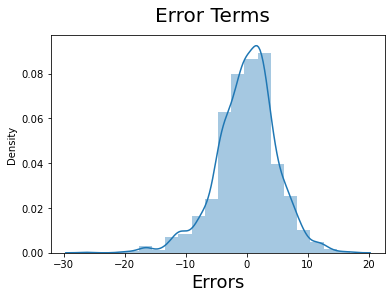

In [31]:
y_train_price = lr_8.predict(X_train_lm)
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

In [32]:
df_test

,Life expectancy,Adult Mortality,infant deaths,percentage expenditure,Measles,BMI,under-five deaths,Polio,Diphtheria,HIV/AIDS,GDP,thinness 5-9 years,Income composition of resources,Schooling,UN_population,Developing
459,71.4,14.0,0,240.139715,0,23.7,0,94.0,93.0,0.8,1976.458560,8.7,0.574,11.1,4.681640e+05,1
2843,71.7,134.0,0,564.816704,10,52.5,0,65.0,64.0,0.1,3148.365130,1.4,0.596,10.8,2.606177e+05,1
2033,67.0,223.0,65,105.730698,118,2.1,84,9.0,89.0,0.1,1194.697155,9.7,0.642,11.6,8.526100e+07,1
775,72.7,166.0,6,664.558524,0,53.6,8,85.0,88.0,0.9,5451.669600,3.3,0.697,12.9,9.445281e+06,1
2452,69.1,197.0,6,15.353423,35,16.1,10,97.0,97.0,0.1,174.669200,15.5,0.705,12.8,1.943500e+07,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2629,54.7,355.0,15,2.995960,295,17.9,22,72.0,72.0,5.2,31.437144,8.7,0.428,9.9,4.970000e+06,1
399,71.1,163.0,1,15.235727,46,57.0,1,94.0,93.0,0.1,169.285860,2.5,0.709,12.9,8.170172e+06,0
386,74.1,14.0,1,149.659879,14,64.5,1,95.0,95.0,0.1,7674.865590,1.9,0.781,14.4,7.282041e+06,0
2481,69.5,22.0,0,685.029908,0,52.6,0,84.0,84.0,0.8,5761.395360,3.4,0.684,11.7,5.099700e+05,1


In [33]:
# #Scaled our test data
# num_vars = ["Life expectancy ", "Adult Mortality", "infant deaths", "percentage expenditure", "Measles ", 
#             " BMI ", "under-five deaths ", "Polio", "Diphtheria ", " HIV/AIDS", "GDP", " thinness 5-9 years", 
#             "Income composition of resources", "Schooling", "UN_population"]
# df_test[num_vars] = scaler.transform(df_test[num_vars])

# df_test

In [34]:
y_test = df_test.pop("Life expectancy ")
X_test = df_test

# Adding constant variable to test dataframe
X_test_m8 = sm.add_constant(X_test)

# Creating X_test_m4 dataframe by dropping variables from X_test_m4
X_test_m8 = X_test_m8.drop(["infant deaths", " thinness 5-9 years", "percentage expenditure", "Schooling",
                            "Diphtheria ", "Income composition of resources", "Polio"], axis = 1) 
                            
# Making predictions using the final model
y_pred_m8 = lr_8.predict(X_test_m8)

/Users/Scott/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [39]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
# r2_score(y_true = y_test, y_pred = y_pred_m8)
score = r2_score(y_test, y_pred_m8)
print('r2 score is', score)
print('mean_sqrd_error is', mean_squared_error(y_test, y_pred_m8))
print('root_mean_squared_error is', np.sqrt(mean_squared_error(y_test, y_pred_m8)))

r2 score is 0.7078391452854138
mean_sqrd_error is 26.632844225685584
root_mean_squared_error is 5.160701912112884


In [47]:
print( "Accuracy of the model is %.2f" %score)

Accuracy of the model is 0.71


In [43]:
#create dataframe of actual vs predicted
df = pd.DataFrame({"Actual":y_test, "Predicted": y_pred_m8})
df.head()

,Actual,Predicted
459,71.4,70.661946
2843,71.7,71.664988
2033,67.0,63.625909
775,72.7,70.916064
2452,69.1,65.612946


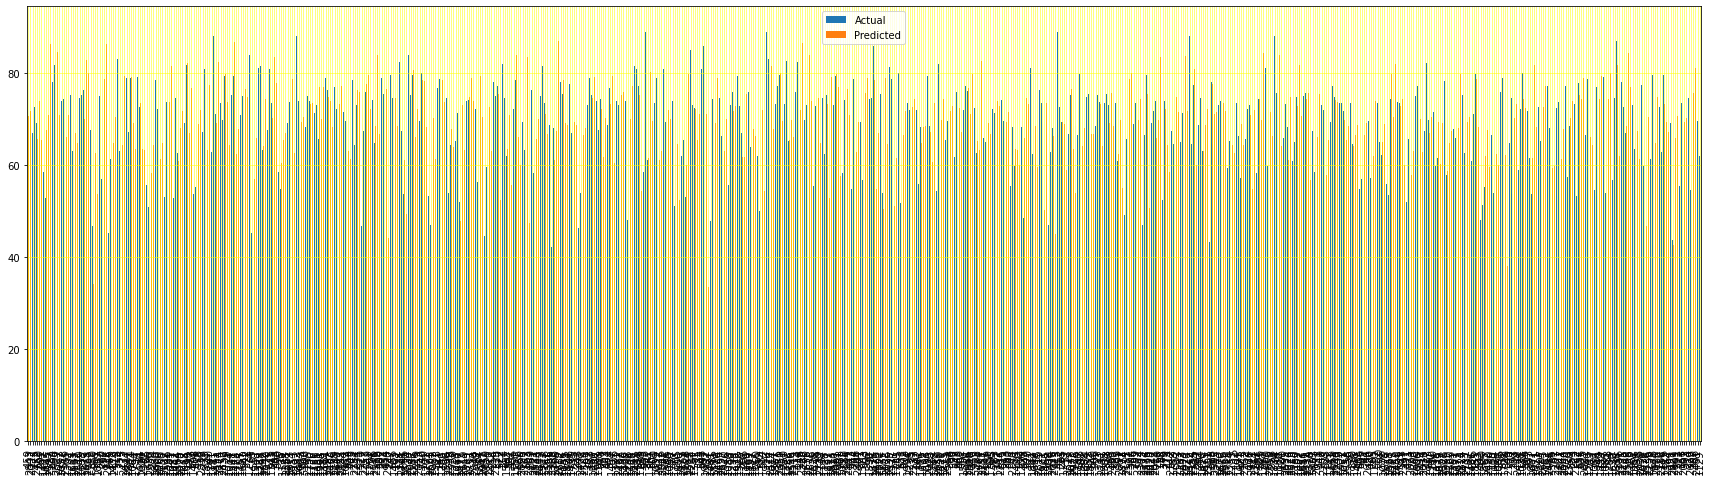

In [46]:
#try to visualize but too many points for x-axis
df.plot(kind="bar", figsize=(30,8))
plt.grid(which="major", linestyle="-", linewidth="0.5", color = "yellow")
plt.grid(which="minor", linestyle=":", linewidth = "0.5", color = "black")
plt.show()